Carga de librerias.

In [27]:
!pip install -U scikit-learn

import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn import datasets, linear_model 
from sklearn.metrics import mean_squared_error, r2_score

Carga de datos.

In [28]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

Visualización de los datos.

In [29]:
def display_data_table(X, y):
    df = pd.DataFrame({'Velocidad de Producción': X.flatten(), 'Calidad de los Chips': y})
    print(df)

display_data_table(X, y)

    Velocidad de Producción  Calidad de los Chips
0                  0.931280             50.779929
1                  0.087047            -10.065270
2                 -1.057711            -34.918392
3                  0.314247             10.526743
4                 -0.479174            -17.738377
..                      ...                   ...
95                 1.852278             78.085079
96                -1.424748            -70.968483
97                -0.719844            -38.902213
98                -0.072010              4.339229
99                -0.309212            -21.578326

[100 rows x 2 columns]


Divide los datos entrenamiento y evaluación.

In [30]:
X_train, X_test = X[:-20], X[-20:]
y_train, y_test = y[:-20], y[-20:]

Realiza la regresión lineal.

In [31]:
regr = linear_model.LinearRegression()

Entrena el modelo.

In [32]:
regr.fit(X_train, y_train)

LinearRegression()

Realiza la predicción para su validación.

In [33]:
y_pred = regr.predict(X_test)

Cálculo de matrices.

In [34]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

Muestra la tabla resumen de las métricas.

In [35]:
metricas = ['Error Absoluto Medio (MAE)', 'Error Cuadrático Medio (MSE)', 
            'Raíz Cuadrada del Error Cuadrático Medio (RMSE)', 
            'Coeficiente de Determinación (R²)']
valores = [np.mean(np.abs(y_test - y_pred)), mse, rmse, r2]

df_metricas = pd.DataFrame({'Métrica': metricas, 'Valor': valores})
print(df_metricas)

                                           Métrica      Valor
0                       Error Absoluto Medio (MAE)   6.002961
1                     Error Cuadrático Medio (MSE)  44.460933
2  Raíz Cuadrada del Error Cuadrático Medio (RMSE)   6.667903
3                Coeficiente de Determinación (R²)   0.972134


Muestra la gráfica

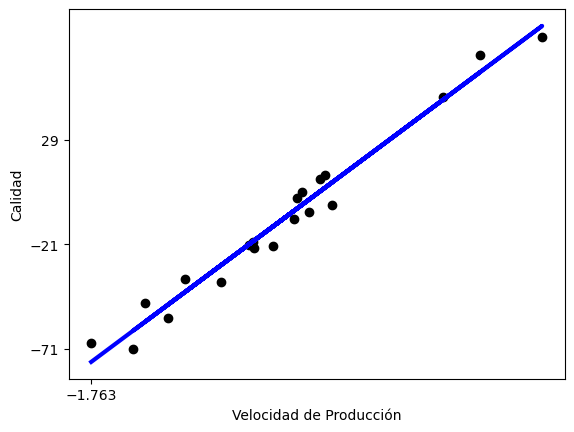

In [37]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xlabel('Velocidad de Producción')
plt.ylabel('Calidad')

plt.xticks(np.arange(X_test.min(), X_test.max(), 50))
plt.yticks(np.arange(y_test.min(), y_test.max(), 50))

plt.show()